# Intro to inferential statistics: the Central Limit Therem

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import random

## Generate a population

We  artificially generate 10,000 random observations that follow a weird distribution. This is going to be our population.

Note: we generally don't have access to data about the entire population. We only do this for learning purposes, to demonstrate where do some concepts emerge from.

In [2]:
# some of the observations follow an exponential dist
r1 = stats.expon.rvs(size=4000, random_state=1000)

# some follow a normal dist
r2 = stats.norm.rvs(loc=2, scale=1.5, size=500, random_state=847)

# some follow a constant dist
r3 = stats.uniform.rvs(loc=-2, scale=9, size=4000, random_state=128)

# there's a weird spike at some point
r4 = stats.uniform.rvs(loc=5.5, scale=1, size=4000, random_state=128)

pop = pd.Series(np.concatenate([r1, r2, r3, r4]))

pop = np.abs(pop) + 0.1

Here's the distribution of our population:

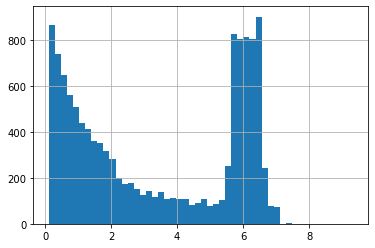

In [3]:
pop.hist(bins=50);

In [4]:
# Population mean:
pop_mean = np.mean(pop)
pop_mean

3.387146352373622

In [5]:
# Population standard deviation:
pop_std = np.std(pop)
pop_std

2.4383710869547723

Let's take a sample from our population.

In [3]:
# sample of size 50
sample = pop.sample(50, random_state=9)
sample

3802     0.861175
957      0.438652
6571     0.547272
9897     6.345165
2164     1.330450
8145     1.843843
4616     1.364181
6315     3.839597
1421     0.465314
7733     1.242397
7299     3.866450
9768     6.362500
8461     0.602888
6729     1.233476
4844     6.716101
8388     1.606900
3843     0.576907
591      0.399612
8637     6.277815
10090    6.078741
11522    6.028725
9640     6.535160
8488     3.549672
9025     5.926596
3242     1.630294
3145     0.916438
10999    6.548737
2512     0.465762
9976     6.427194
2682     1.161607
1183     1.075996
10787    6.192950
2947     0.728226
9280     5.627765
5275     4.589773
3674     1.397651
2785     2.230015
2886     0.227609
7167     0.857430
11048    6.436175
4422     2.816546
6682     5.883390
10991    6.315292
12175    5.600536
7753     1.672898
6552     1.882510
562      0.299647
6047     1.560643
2683     0.151006
12415    6.295093
dtype: float64

The mean of the sample is similar but not equal to the mean of the population. By the way, the mean of the sample is called... well, **sample mean**.

In [7]:
# Sample mean
np.mean(sample)

3.0606154642076495

In [8]:
# The same happens with the sample standard deviation
np.std(sample, ddof=1)

2.4693495546872994

If we take a diferent sample, the parameters will vary:

In [9]:
# sample of size n
sample_size = 50
sample = pop.sample(sample_size, random_state=314159)

# sample mean
np.mean(sample)

3.3525982314987193

Now we take 10,000 samples, each one of size 50

In [10]:
samples = []
number_of_samples = 10000
sample_size = 50


for number in range(number_of_samples): 
    simple_random_sample = pop.sample(n=sample_size)
    samples.append([simple_random_sample])

In [11]:
np.mean(samples[1])

3.4708776483229444

Let's take the means of all those samples

In [12]:
sample_means = [np.mean(s) for s in samples]

The result is the **sampling distribution** of the **sample means**:

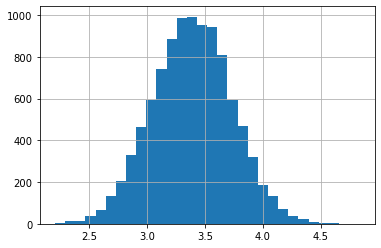

In [13]:
sampling_dist_sample_means=pd.Series(sample_means)

sampling_dist_sample_means.hist(bins=30);

If the samples are random, independent and large enough (rule of thumb: at least of size 30), and the population does not contain very extreme outliers, the sampling distribution will ressemble a normal distribution. This is the essence of the **Central Limit Theorem**.

This is not super important, but in case you wanna double check this distribution follows a normal distribution, you can use a "Quantile-quantile plot".

Learn more about qqplots here:
https://www.statisticshowto.com/q-q-plots/#:~:text=Q%20Q%20Plots%20 


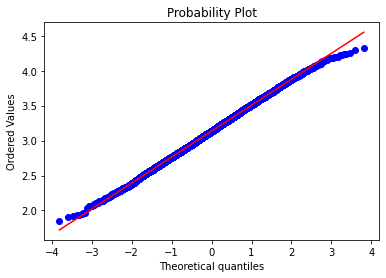

In [32]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(sampling_dist_sample_means,
               dist="norm",
               plot=plt);

The mean of the sampling distribution of the sample means should be pretty close to the true mean of the population:

In [14]:
pop_mean

3.387146352373622

In [15]:
mean_sdsm = np.mean(sampling_dist_sample_means)
print(mean_sdsm)
print(pop_mean - mean_sdsm)

3.3879031345979036
-0.0007567822242817712


But we can do better than that: we know that in a normal distribution, 95% of the values fall within 2 standard deviations of the mean. Let's check that:

In [16]:
np.std(sampling_dist_sample_means)

0.34108722947266323

In [17]:
# Standard deviation of the samp. dist. of sample means
std_sdsm = np.std(sampling_dist_sample_means)

# The lower and upper bound of the interval that should contain
# ~95% of the sample means
lower_bound = mean_sdsm - 2*std_sdsm
upper_bound = mean_sdsm + 2*std_sdsm

print(round(lower_bound, 2), "-", round(upper_bound, 2))

2.71 - 4.07


In [18]:
# How many of the sample means fall within this interval?
count = 0
for i in sample_means:
    if i > lower_bound and i < upper_bound:
        count +=1
print(f"Percentage of sample means within 2 std of the mean = {count/len(sample_means)*100}")

Percentage of sample means within 2 std of the mean = 95.43


Another cool property of the sampling distribution of the sample means is that its *standard deviation* is equal to the standard deviation of the population divided by the square root of n. 

Let's see how this checks out with our data:

In [19]:
# standard deviation of the sample distribution of sample means
std_sdsm

0.34108722947266323

In [21]:
# population standard deviation / square root of population size
pop_std/np.sqrt(sample_size)

0.3448377461269864

In [24]:
np.std(sample)/np.sqrt(sample_size)

0.32816046296788187

In [25]:
stats.sem(sample, 
          ddof=0)

0.32816046296788187

The *standard deviation of the sampling distribution of the sample means* is also called the **standard error of the mean** and we'll use it in the next lessons.

Before moving on, repeat the experiment with diferent sample sizes (both smaller and greater), and see what happens.

## Squirrels example

Let's assume that the 'pop' values represent the weights of squirrels. We go to the forest, take a random sample of 50 squirrels and register their weight:

In [26]:
squirrels = pop.sample(50, random_state=1990)

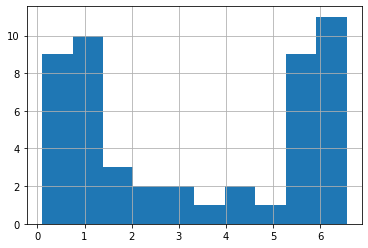

In [27]:
# this is the distribution of the sample
squirrels.hist();

In [28]:
# We wonder if the mean of the weights of the squirrels is
# close to the 'true' mean of the population (which we can't measure)
np.mean(squirrels)

3.3492958902381855

The standard error of the mean is an estimate of how far the sample mean is likely to be from the population mean.

It is an estimate of the standard deviation of the distribution of the sample means, which, as we've seen, follows a normal ditribution.

In [29]:
# standard error of the mean
np.std(squirrels)/np.sqrt(len(squirrels))

0.3416431445218166

In [30]:
# using scipy you can also calculate the standard error of the mean
stats.sem(squirrels, 
          ddof=0) # degrees of freedom. the default is 1,
                  # which results in a more conservative estimate

0.34164314452181666

We know that no matter the distribution of our sample or the population, the sampling distribution of the sample means is normal (Central Limit Theorem).

Knowing that, we can use the properties of the normal distribution to gain information about our sample and how much it might differ from the true population.

In a normal distribution, 95% of the observations fall within 2 standard deviations above and below the mean.

We have the mean of the sample. And we also computed the standard error, which is an estimate of the standard deviation of the sample means.

With those values, we can compute the confidence interval.

The **confidence interval** is a 'plausible range of values' for a population parameter (in this case, the mean).


In [31]:
# upper bound of the confidence interval
np.mean(squirrels) + stats.sem(squirrels)*2

4.039519273773249

In [32]:
# lower bound of the confidence interval
np.mean(squirrels) - stats.sem(squirrels)*2

2.6590725067031222

In [33]:
# using scipy to calculate the confidence interval:
stats.norm.interval(0.95, # the confidence level
                 loc=np.mean(squirrels), # mean of our sample
                 scale=stats.sem(squirrels)) # standard error of the mean

(2.672889403730135, 4.025702376746236)

In [34]:
# using a t distribution:
stats.t.interval(0.95, # the confidence level
                 len(squirrels)-1, # degrees of freedom = sample size - 1
                 loc=np.mean(squirrels), # mean of our sample
                 scale=stats.sem(squirrels)) # standard error of the mean

(2.6557679813294803, 4.042823799146891)

In the second interval we've used a t distribution, instead of a normal distribution, to get a more conservative estimate of the confidence intermal.

A t distribution is 'flatter' and has 'fat tails' for small populations, and is indistinguishable from a normal distribution for bigger populations.

The confidence interval is slightly thinner if we use a normal distribution.